## Name - Jaisingh Chauhan
## Roll No. - 17
## Topic - Predictive Data Analytics on the US Graduate Admissions
## Date - 15/08/2022

### Introduction
In this Project , I utilzed the U.S. graduate schools admission dataset from the Kaggle
datasets in order to predict admission from important parameters within the dataset.

The goal is accomplished through extracting all data insights and salient features out
of the admission dataset through useful data manipulation as well as visualization methods by leveraging Python libraries, modules and other tools for numerical computation and Data visualization accompanied by deriving
practical hints as to how increase your chance of admission into top-tier Graduate schools in
the United States.


### Start With Analysis

##### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

from IPython.display import display

#Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import scipy.stats as stats
from scipy.stats.mstats import winsorize

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

##### Loading Data

In [3]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df = data.copy()

### Data PreProcessing and Cleaning

In [5]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

In [6]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [7]:
with pd.option_context('display.max_rows',500):
    display(df)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
5             6        330          115                  5  4.5   3.0  9.34   
6             7        321          109                  3  3.0   4.0  8.20   
7             8        308          101                  2  3.0   4.0  7.90   
8             9        302          102                  1  2.0   1.5  8.00   
9            10        323          108                  3  3.5   3.0  8.60   
10           11        325          106                  3  3.5   4.0  8.40   
11           12        327          111                  4  4.0   4.5  9.00   
12           13        328          112                  4  4.0   4.5  9.10   
13           14        307          109                  3  4.0   3.0  8.00   
14           15        311          104                  3  3.5   2.0  8.20   
15           16        314          105                  3  3.5   2.5  8.30   
16           17        317          107                  3  4.0   3.0  8.70   
17           18        319          106                  3  4.0   3.0  8.00   
18           19        318          110                  3  4.0   3.0  8.80   
19           20        303          102                  3  3.5   3.0  8.50   
20           21        312          107                  3  3.0   2.0  7.90   
21           22        325          114                  4  3.0   2.0  8.40   
22           23        328          116                  5  5.0   5.0  9.50   
23           24        334          119                  5  5.0   4.5  9.70   
24           25        336          119                  5  4.0   3.5  9.80   
25           26        340          120                  5  4.5   4.5  9.60   
26           27        322          109                  5  4.5   3.5  8.80   
27           28        298           98                  2  1.5   2.5  7.50   
28           29        295           93                  1  2.0   2.0  7.20   
29           30        310           99                  2  1.5   2.0  7.30   
30           31        300           97                  2  3.0   3.0  8.10   
31           32        327          103                  3  4.0   4.0  8.30   
32           33        338          118                  4  3.0   4.5  9.40   
33           34        340          114                  5  4.0   4.0  9.60   
34           35        331          112                  5  4.0   5.0  9.80   
35           36        320          110                  5  5.0   5.0  9.20   
36           37        299          106                  2  4.0   4.0  8.40   
37           38        300          105                  1  1.0   2.0  7.80   
38           39        304          105                  1  3.0   1.5  7.50   
39           40        307          108                  2  4.0   3.5  7.70   
40           41        308          110                  3  3.5   3.0  8.00   
41           42        316          105                  2  2.5   2.5  8.20   
42           43        313          107                  2  2.5   2.0  8.50   
43           44        332          117                  4  4.5   4.0  9.10   
44           45        326          113                  5  4.5   4.0  9.40   
45           46        322          110                  5  5.0   4.0  9.10   
46           47        329          114                  5  4.0   5.0  9.30   
47           48        339          119                  5  4.5   4.0  9.70   
48           49        321          110                  3  3.5   5.0  8.85   
49           50        327          111                

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

###### Removing leading and trailing spaces from the column names

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

###### Using the Serial No. column as the index for dataframe to address the redundancy issue

In [10]:
df.set_index('Serial No.', inplace=True)
df
# df.drop(['Serial No.'],axis = 1,inplace =True)
# df

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   
...               ...          ...                ...  ...  ...   ...   
496               332          108                  5  4.5  4.0  9.02   
497               337          117                  5  5.0  5.0  9.87   
498               330          120                  5  4.5  5.0  9.56   
499               312          103                  4  4.0  5.0  8.43   
500               327          113                  4  4.5  4.5  9.04   

            Research  Chance of Admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65  
...              ...              ...  
496                1             0.87  
497                1             0.96  
498                1             0.93  
499                0             0.73  
500                0             0.84  

[500 rows x 8 columns]

In [11]:
with pd.option_context('display.max_rows', 500):
    display(df)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   
6                 330          115                  5  4.5  3.0  9.34   
7                 321          109                  3  3.0  4.0  8.20   
8                 308          101                  2  3.0  4.0  7.90   
9                 302          102                  1  2.0  1.5  8.00   
10                323          108                  3  3.5  3.0  8.60   
11                325          106                  3  3.5  4.0  8.40   
12                327          111                  4  4.0  4.5  9.00   
13                328          112                  4  4.0  4.5  9.10   
14                307          109                  3  4.0  3.0  8.00   
15                311          104                  3  3.5  2.0  8.20   
16                314          105                  3  3.5  2.5  8.30   
17                317          107                  3  4.0  3.0  8.70   
18                319          106                  3  4.0  3.0  8.00   
19                318          110                  3  4.0  3.0  8.80   
20                303          102                  3  3.5  3.0  8.50   
21                312          107                  3  3.0  2.0  7.90   
22                325          114                  4  3.0  2.0  8.40   
23                328          116                  5  5.0  5.0  9.50   
24                334          119                  5  5.0  4.5  9.70   
25                336          119                  5  4.0  3.5  9.80   
26                340          120                  5  4.5  4.5  9.60   
27                322          109                  5  4.5  3.5  8.80   
28                298           98                  2  1.5  2.5  7.50   
29                295           93                  1  2.0  2.0  7.20   
30                310           99                  2  1.5  2.0  7.30   
31                300           97                  2  3.0  3.0  8.10   
32                327          103                  3  4.0  4.0  8.30   
33                338          118                  4  3.0  4.5  9.40   
34                340          114                  5  4.0  4.0  9.60   
35                331          112                  5  4.0  5.0  9.80   
36                320          110                  5  5.0  5.0  9.20   
37                299          106                  2  4.0  4.0  8.40   
38                300          105                  1  1.0  2.0  7.80   
39                304          105                  1  3.0  1.5  7.50   
40                307          108                  2  4.0  3.5  7.70   
41                308          110                  3  3.5  3.0  8.00   
42                316          105                  2  2.5  2.5  8.20   
43                313          107                  2  2.5  2.0  8.50   
44                332          117                  4  4.5  4.0  9.10   
45                326          113                  5  4.5  4.0  9.40   
46                322          110                  5  5.0  4.0  9.10   
47                329          114                  5  4.0  5.0  9.30   
48                339          119                  5  4.5  4.0  9.70   
49                321          110                  3  3.5  5.0  8.85   
50                327          111                  4  3.0  4.0  8.40   
51                313           98                  3  2.5  4.5  8.30   
52                312          100                  2  1.5  3.5  7.90   
53                334          116                  4  4.0  3.0  8.00 

In [12]:
df.shape

(500, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


###### No Missing Values are present

### Outlier Analysis

In [14]:
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in list(data.columns):
        i += 1
        plt.subplot(9, 5, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 5, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()

In [15]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    print(50*'=')

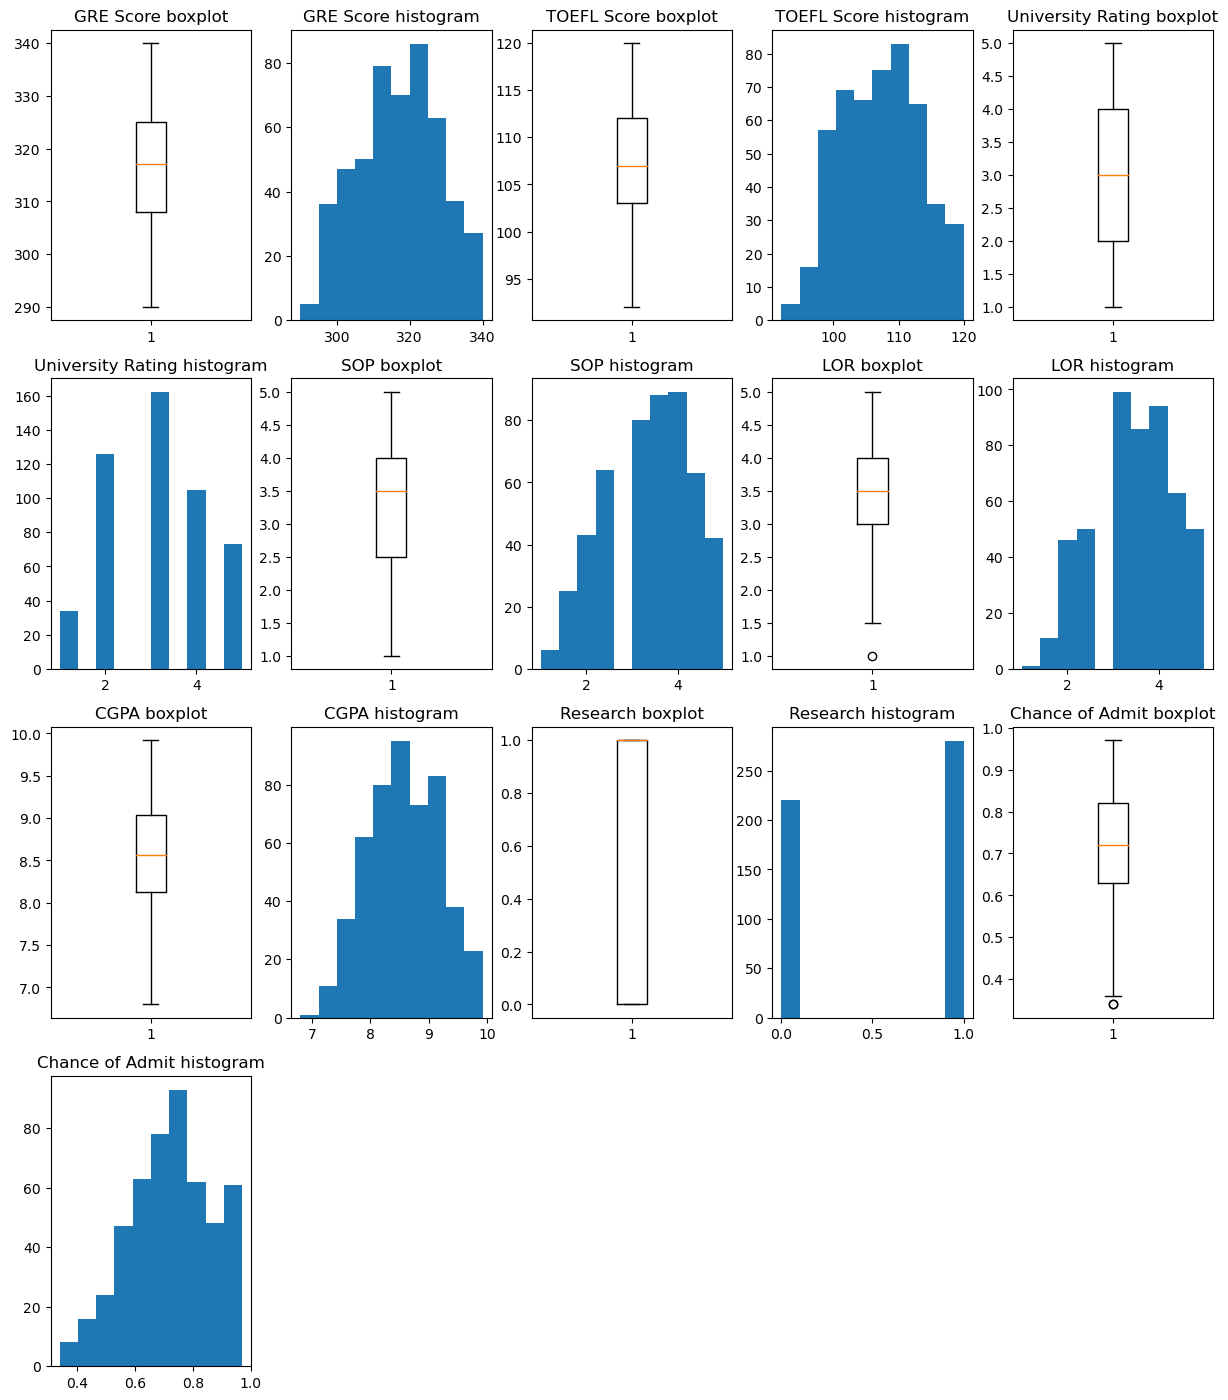

In [16]:
outliers_visual(df)

In [17]:
for col in df.columns:
    outlier_count(col)

---------------GRE Score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------TOEFL Score---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------University Rating---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------SOP---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------LOR---------------
Number of outliers: 1
Percent of data that is outlier: 0.2%
---------------CGPA---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Research---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Chance of Admit---------------
Number of outliers: 2
Percent of data that is outlier: 0.4%


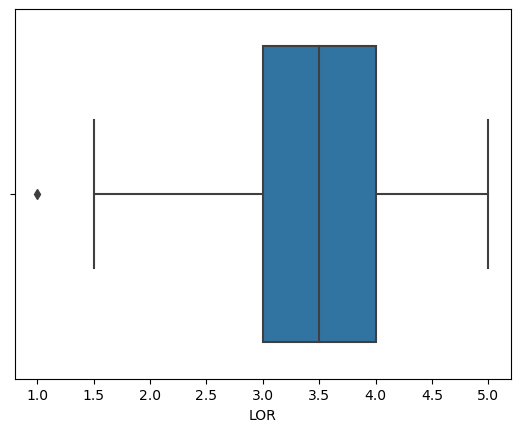

In [18]:
sns.boxplot(data=df,x=df['LOR']);

In [19]:
Q1=df['LOR'].quantile(0.25)
Q3=df['LOR'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

3.0
4.0
1.0
1.5 5.5


In [20]:
#Explore different quantiles at the lower end
print('10% quantile  : ', df['LOR'].quantile(0.10))       
print('7.5% quantile : ', df['LOR'].quantile(0.075))      
print('5% quantile   : ', df['LOR'].quantile(0.05))       
print('2.5% quantile : ', df['LOR'].quantile(0.025))     
print('1% quantile   : ', df['LOR'].quantile(0.01))       
print('0.5% quantile : ', df['LOR'].quantile(0.005))      
print('0.1% quantile : ', df['LOR'].quantile(0.001)) 

10% quantile  :  2.0
7.5% quantile :  2.0
5% quantile   :  2.0
2.5% quantile :  2.0
1% quantile   :  1.5
0.5% quantile :  1.5
0.1% quantile :  1.2495


In [21]:
df['LOR']=winsorize(df['LOR'], limits=(0.005,0))

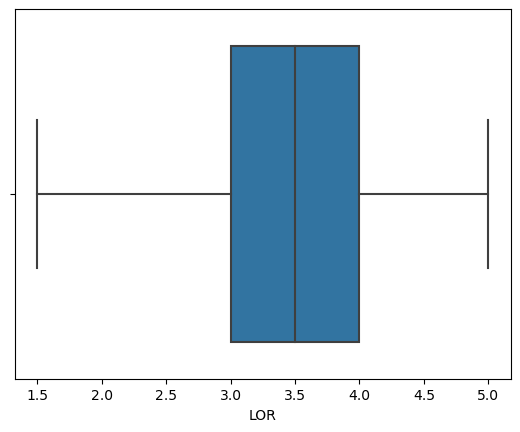

In [22]:
sns.boxplot(data=df,x=df['LOR']);

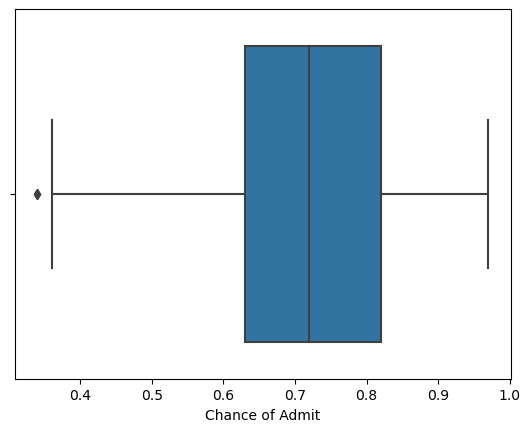

In [23]:
sns.boxplot(data=df,x=df['Chance of Admit']);

In [24]:
Q1=df['Chance of Admit'].quantile(0.25)
Q3=df['Chance of Admit'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

0.63
0.82
0.18999999999999995
0.3450000000000001 1.105


In [25]:
#Explore different quantiles at the lower end
print('10% quantile  : ', df['Chance of Admit'].quantile(0.10))      
print('7.5% quantile : ', df['Chance of Admit'].quantile(0.075))      
print('5% quantile   : ', df['Chance of Admit'].quantile(0.05))     
print('2.5% quantile : ', df['Chance of Admit'].quantile(0.025))    
print('1% quantile   : ', df['Chance of Admit'].quantile(0.01))      
print('0.5% quantile : ', df['Chance of Admit'].quantile(0.005))     
print('0.1% quantile : ', df['Chance of Admit'].quantile(0.001)) 

10% quantile  :  0.53
7.5% quantile :  0.5
5% quantile   :  0.47
2.5% quantile :  0.43475
1% quantile   :  0.3799
0.5% quantile :  0.36
0.1% quantile :  0.34


In [26]:
df['Chance of Admit']=winsorize(df['Chance of Admit'], limits=(0.005,0))

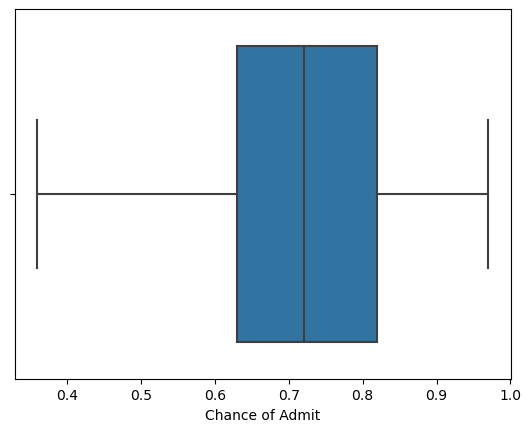

In [27]:
sns.boxplot(data=df,x=df['Chance of Admit']);

In [28]:
with pd.option_context('display.max_rows', 500):
    display(df)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   
6                 330          115                  5  4.5  3.0  9.34   
7                 321          109                  3  3.0  4.0  8.20   
8                 308          101                  2  3.0  4.0  7.90   
9                 302          102                  1  2.0  1.5  8.00   
10                323          108                  3  3.5  3.0  8.60   
11                325          106                  3  3.5  4.0  8.40   
12                327          111                  4  4.0  4.5  9.00   
13                328          112                  4  4.0  4.5  9.10   
14                307          109                  3  4.0  3.0  8.00   
15                311          104                  3  3.5  2.0  8.20   
16                314          105                  3  3.5  2.5  8.30   
17                317          107                  3  4.0  3.0  8.70   
18                319          106                  3  4.0  3.0  8.00   
19                318          110                  3  4.0  3.0  8.80   
20                303          102                  3  3.5  3.0  8.50   
21                312          107                  3  3.0  2.0  7.90   
22                325          114                  4  3.0  2.0  8.40   
23                328          116                  5  5.0  5.0  9.50   
24                334          119                  5  5.0  4.5  9.70   
25                336          119                  5  4.0  3.5  9.80   
26                340          120                  5  4.5  4.5  9.60   
27                322          109                  5  4.5  3.5  8.80   
28                298           98                  2  1.5  2.5  7.50   
29                295           93                  1  2.0  2.0  7.20   
30                310           99                  2  1.5  2.0  7.30   
31                300           97                  2  3.0  3.0  8.10   
32                327          103                  3  4.0  4.0  8.30   
33                338          118                  4  3.0  4.5  9.40   
34                340          114                  5  4.0  4.0  9.60   
35                331          112                  5  4.0  5.0  9.80   
36                320          110                  5  5.0  5.0  9.20   
37                299          106                  2  4.0  4.0  8.40   
38                300          105                  1  1.0  2.0  7.80   
39                304          105                  1  3.0  1.5  7.50   
40                307          108                  2  4.0  3.5  7.70   
41                308          110                  3  3.5  3.0  8.00   
42                316          105                  2  2.5  2.5  8.20   
43                313          107                  2  2.5  2.0  8.50   
44                332          117                  4  4.5  4.0  9.10   
45                326          113                  5  4.5  4.0  9.40   
46                322          110                  5  5.0  4.0  9.10   
47                329          114                  5  4.0  5.0  9.30   
48                339          119                  5  4.5  4.0  9.70   
49                321          110                  3  3.5  5.0  8.85   
50                327          111                  4  3.0  4.0  8.40   
51                313           98                  3  2.5  4.5  8.30   
52                312          100                  2  1.5  3.5  7.90   
53                334          116                  4  4.0  3.0  8.00 

In [29]:
df.shape

(500, 8)

######  Now, No Outliers are Present

### Describe the Dataset

In [30]:
df.describe().transpose()

count       mean        std     min       25%     50%  \
GRE Score          500.0  316.47200  11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200   6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400   1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400   0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48500   0.923027    1.50    3.0000    3.50   
CGPA               500.0    8.57644   0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000   0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72182   0.140929    0.36    0.6300    0.72   

                      75%     max  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance of Admit      0.82    0.97

In [31]:
df.corr()

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524377     0.540630           0.608241  0.662848   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810610     0.792462           0.690613  0.685091   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.524377  0.825878  0.563398         0.810610  
TOEFL Score        0.540630  0.810574  0.467012         0.792462  
University Rating  0.608241  0.705254  0.427047         0.690613  
SOP                0.662848  0.712154  0.408116         0.685091  
LOR                1.000000  0.636923  0.372280         0.645097  
CGPA               0.636923  1.000000  0.501311         0.882940  
Research           0.372280  0.501311  1.000000         0.546048  
Chance of Admit    0.645097  0.882940  0.546048         1.000000

### Exploratory Analysis and Visualization 

 ###### Extracting Data insights as well as visualization methods

In [32]:
df.sample(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
263               308          103                  2  2.5  4.0  8.36   
69                318          109                  3  3.5  4.0  9.22   
138               316          100                  2  1.5  3.0  8.16   
432               320          112                  2  3.5  3.5  8.78   
487               319          102                  3  2.5  2.5  8.37   
125               301          106                  4  2.5  3.0  8.47   
148               326          114                  3  3.0  3.0  9.11   
95                303           99                  3  2.0  2.5  7.66   
250               321          111                  3  3.5  4.0  8.83   
37                299          106                  2  4.0  4.0  8.40   

            Research  Chance of Admit  
Serial No.                             
263                1             0.70  
69                 1             0.68  
138                1             0.71  
432                1             0.73  
487                0             0.68  
125                0             0.57  
148                1             0.83  
95                 0             0.36  
250                1             0.77  
37                 0             0.64

In [33]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

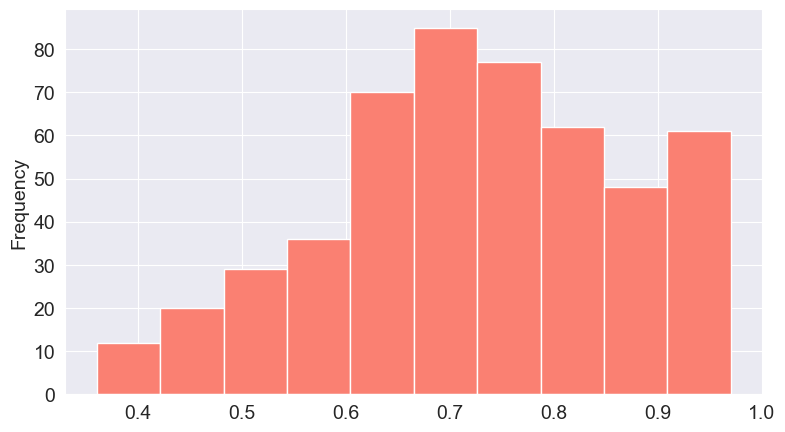

In [34]:
df['Chance of Admit'].plot(kind='hist', color='salmon');

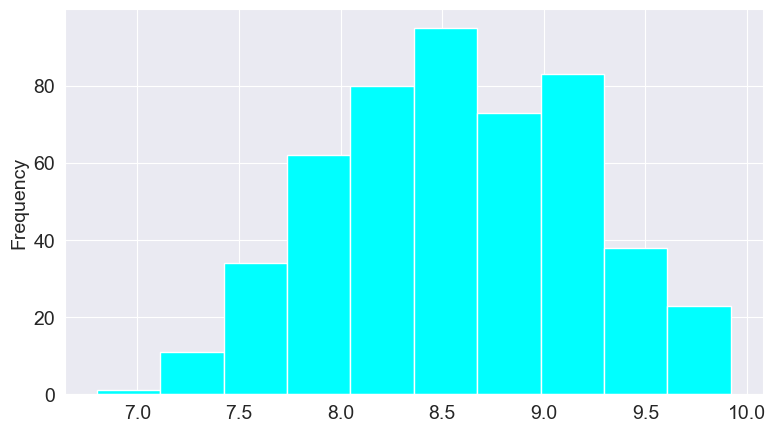

In [35]:
df['CGPA'].plot(kind='hist', color='cyan');

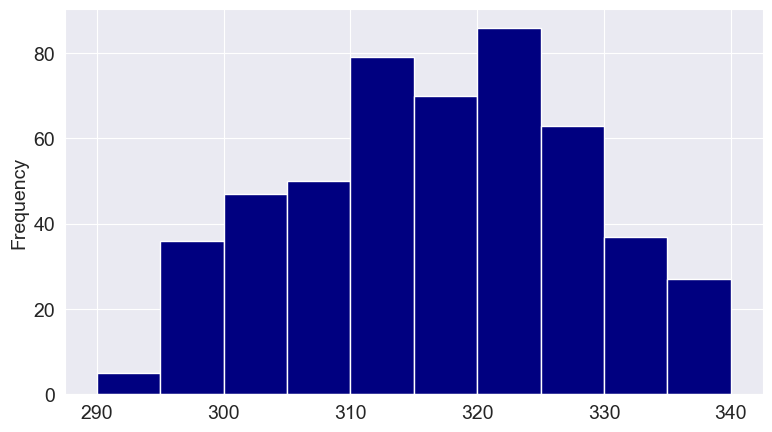

In [36]:
df['GRE Score'].plot(kind='hist', color='navy');

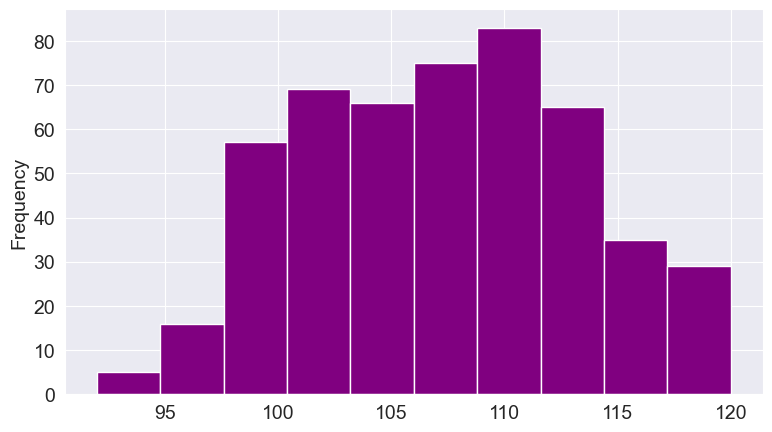

In [37]:
df['TOEFL Score'].plot(kind='hist', color='purple');

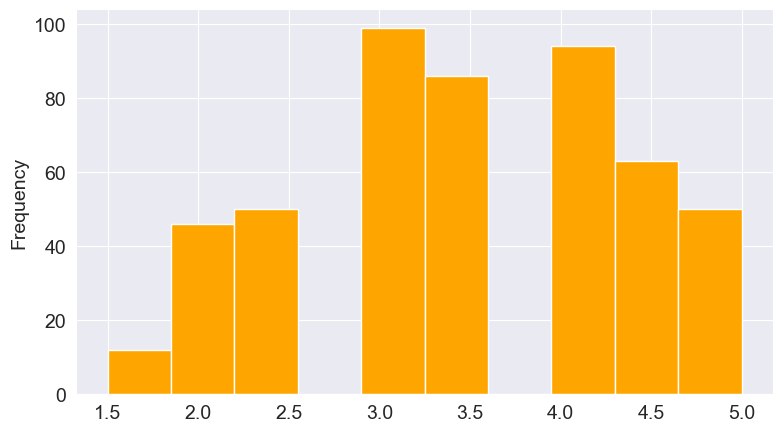

In [38]:
df['LOR'].plot(kind='hist', color='orange');

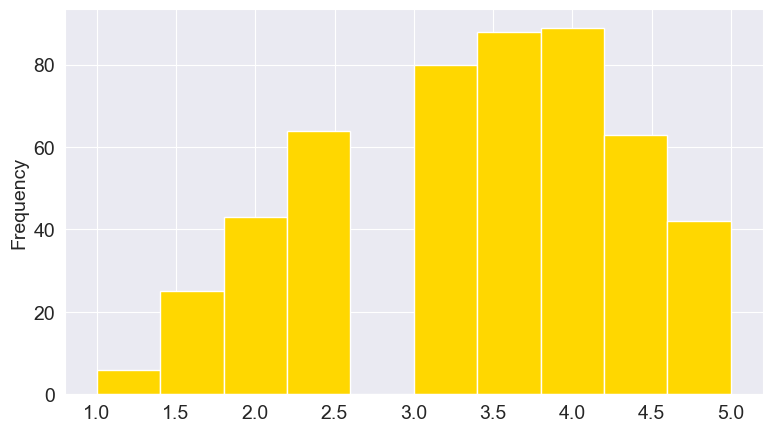

In [39]:
df['SOP'].plot(kind='hist', color='gold');

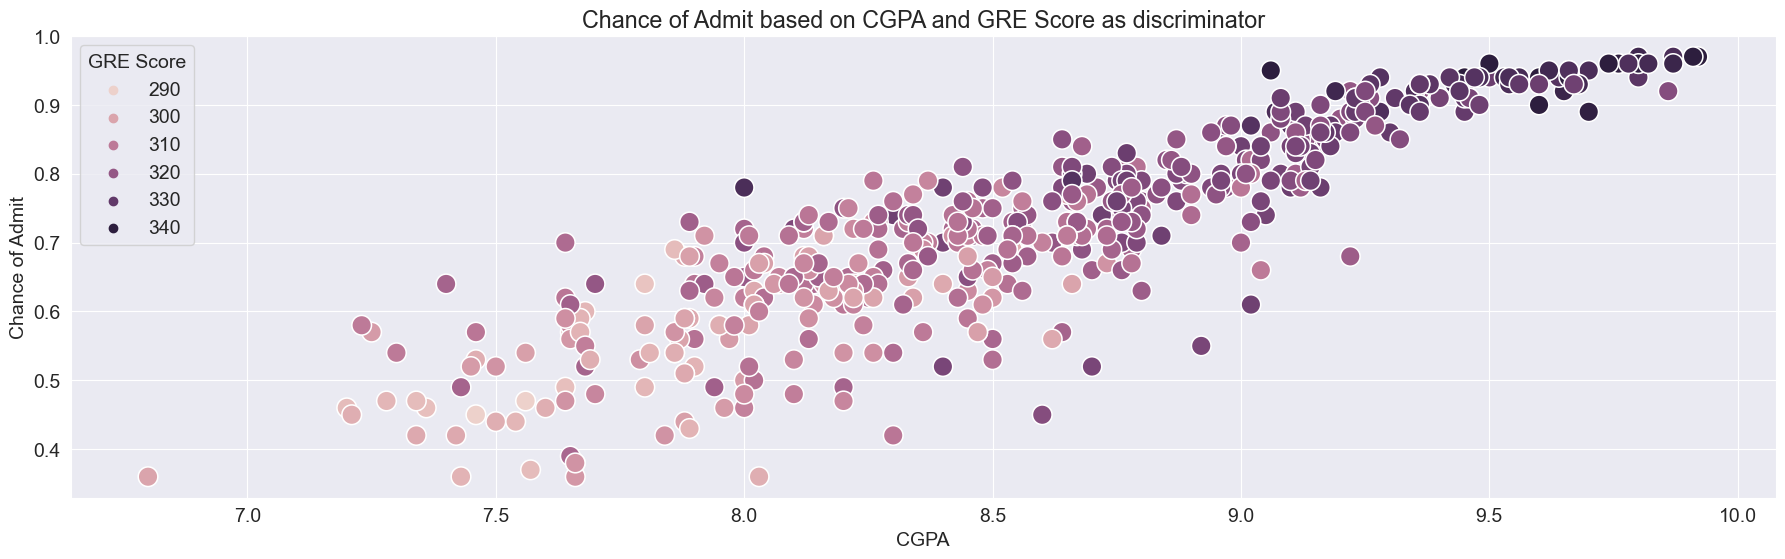

In [40]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and GRE Score as discriminator')

sns.scatterplot(df['CGPA'], df['Chance of Admit'], hue=df['GRE Score'], s=200);

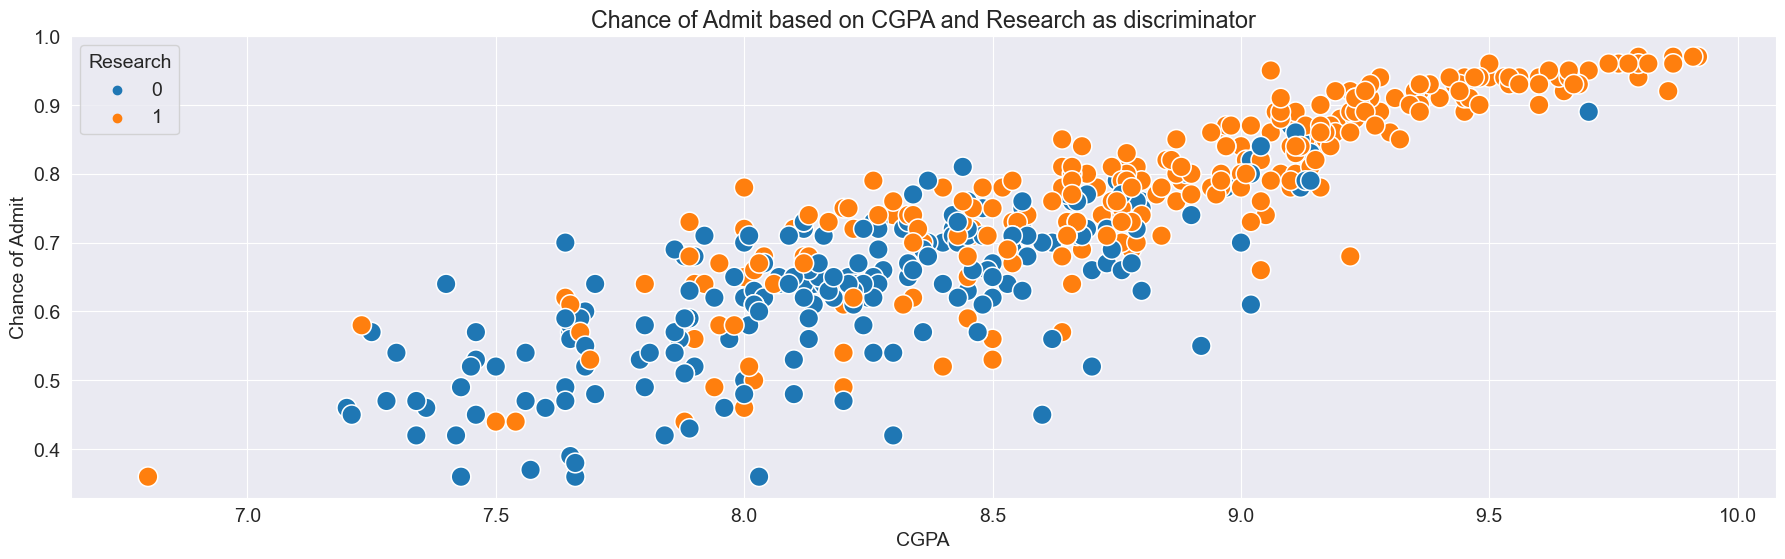

In [41]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and Research as discriminator')


sns.scatterplot(df['CGPA'], df['Chance of Admit'], hue=df['Research'], s=200);

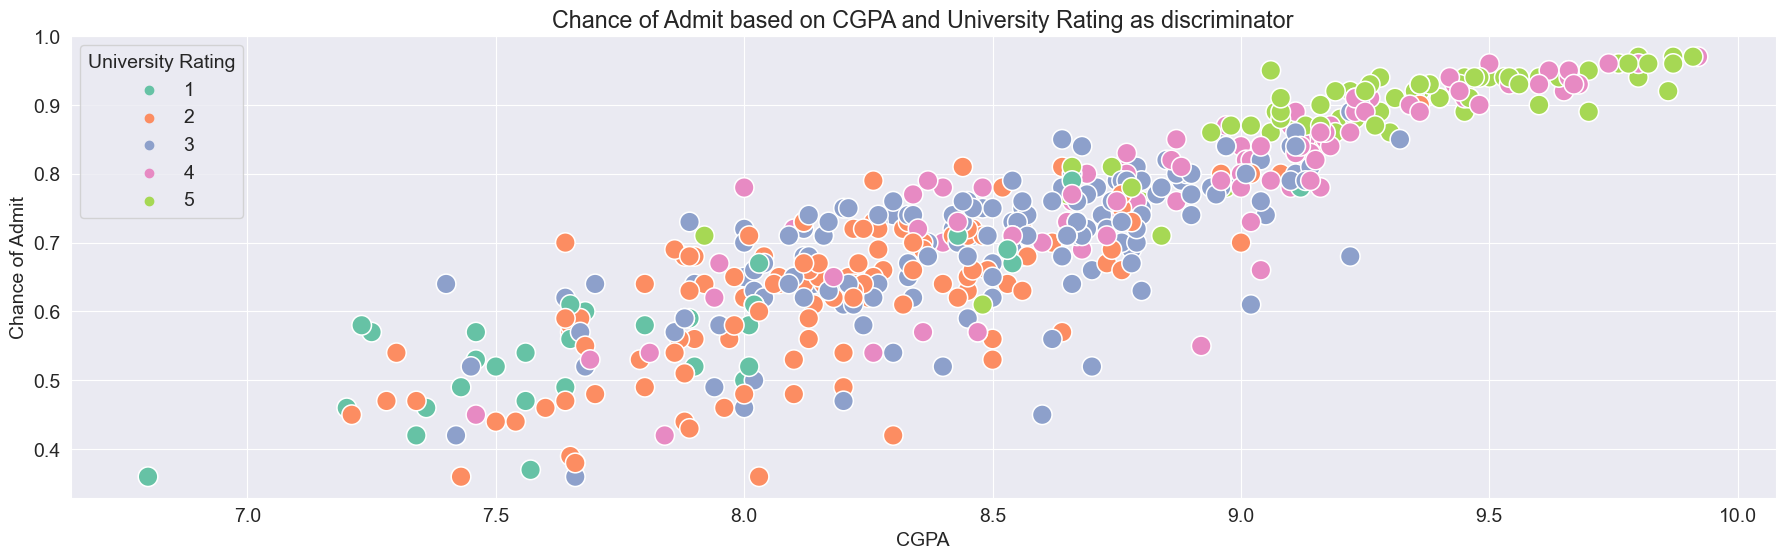

In [42]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and University Rating as discriminator')

sns.scatterplot(df['CGPA'], df['Chance of Admit'], hue=df['University Rating'], s=200, palette="Set2");

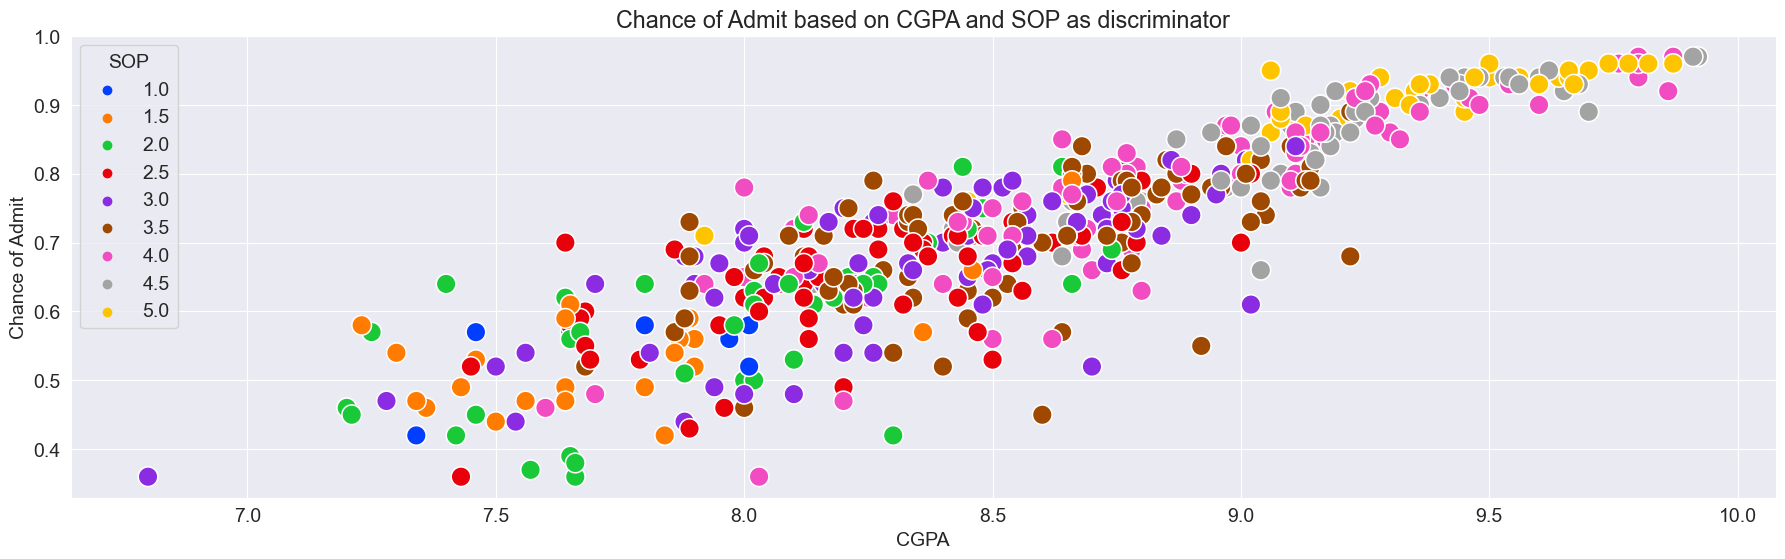

In [43]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and SOP as discriminator')

sns.scatterplot(df['CGPA'], df['Chance of Admit'], hue=df['SOP'], s=200, palette="bright");

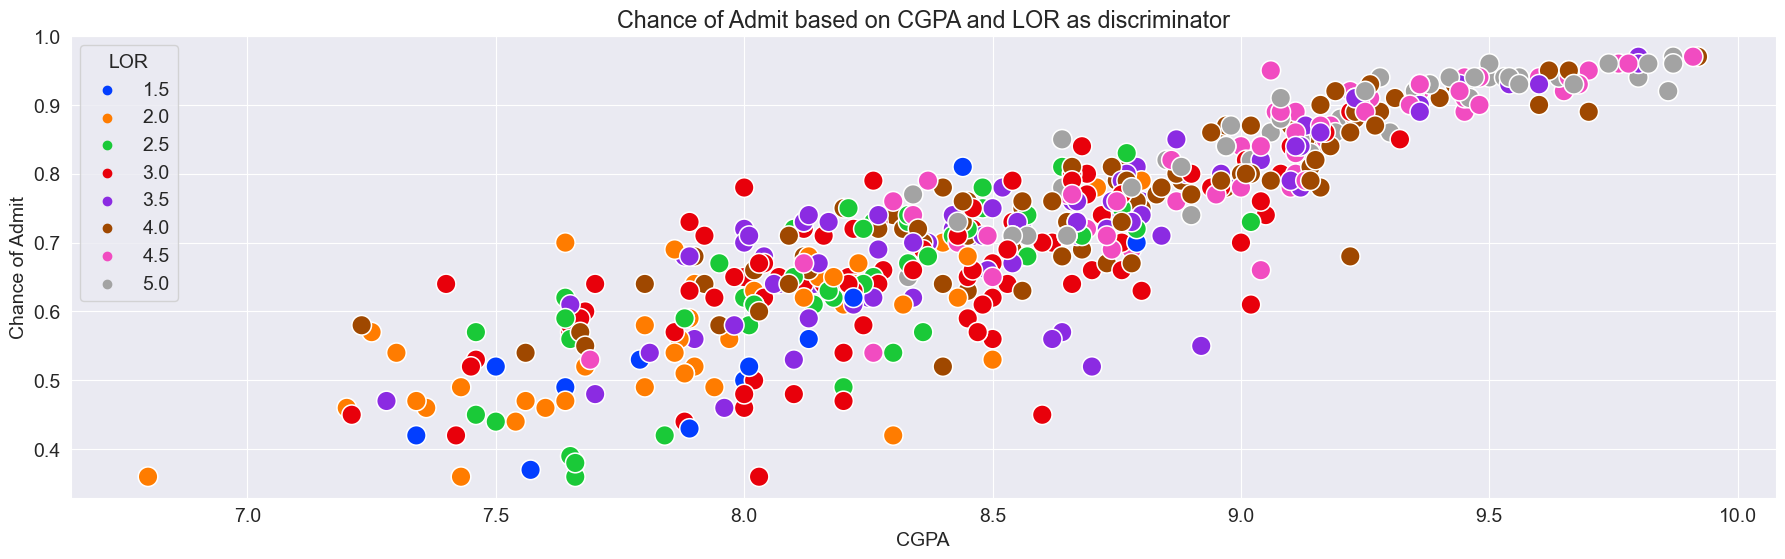

In [44]:
plt.figure(figsize=(22, 6))
plt.title('Chance of Admit based on CGPA and LOR as discriminator')

sns.scatterplot(df['CGPA'], df['Chance of Admit'], hue=df['LOR'], s=200, palette="bright");

In [45]:
cgpa_df = df.groupby('CGPA')[['Chance of Admit', 'GRE Score', 'TOEFL Score']].mean()
cgpa_df

Chance of Admit  GRE Score  TOEFL Score
CGPA                                         
6.80            0.360      300.0         99.0
7.20            0.460      295.0         93.0
7.21            0.450      298.0         97.0
7.23            0.580      310.0        110.0
7.25            0.570      302.0         99.0
...               ...        ...          ...
9.82            0.960      335.0        117.0
9.86            0.920      323.0        111.0
9.87            0.965      335.5        118.5
9.91            0.970      340.0        120.0
9.92            0.970      340.0        120.0

[184 rows x 3 columns]

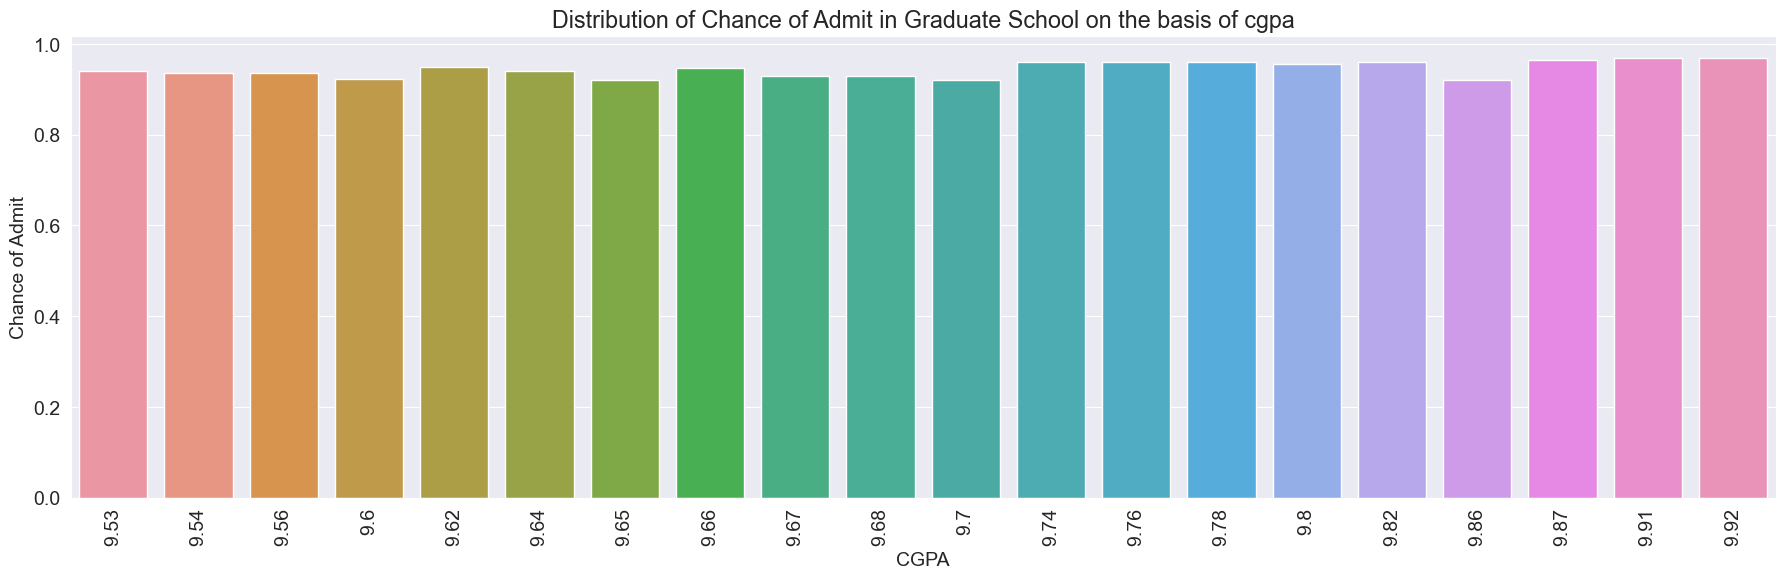

In [46]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
plt.title("Distribution of Chance of Admit in Graduate School on the basis of cgpa")
sns.barplot(cgpa_df.tail(20).index, cgpa_df['Chance of Admit'].tail(20));

Various types of charts for pairs of features within Graduate Admission dataframe based on University Rating:


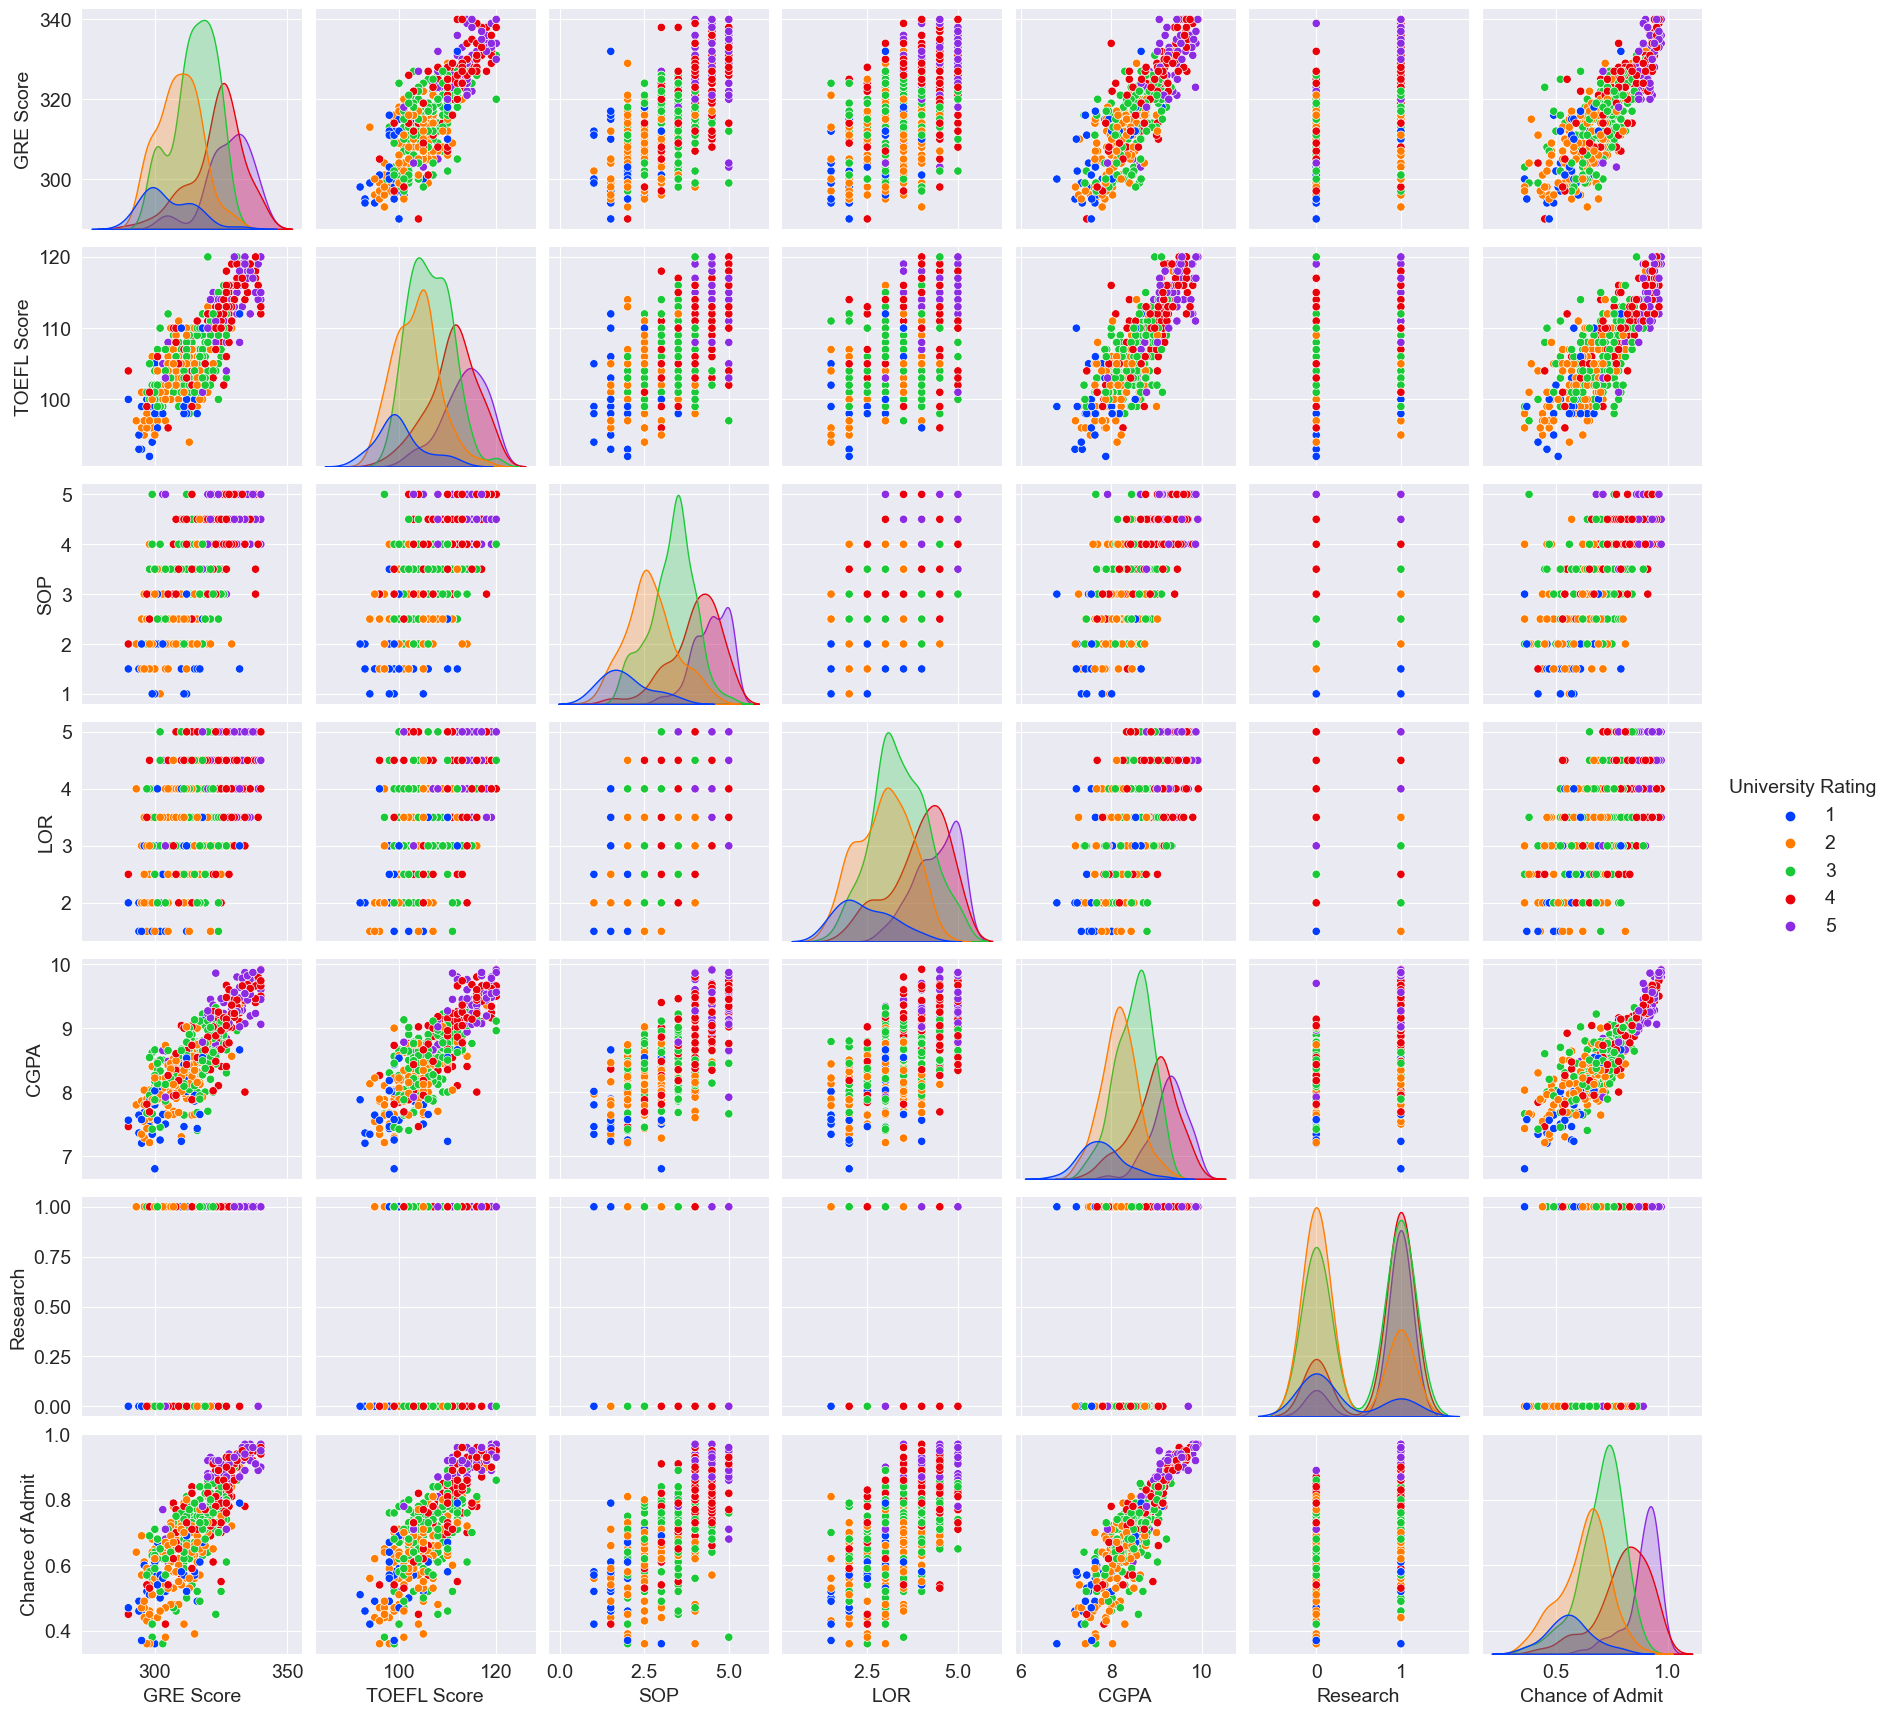

In [47]:
print("Various types of charts for pairs of features within Graduate Admission dataframe based on University Rating:")
sns.pairplot(df, hue='University Rating',palette="bright");

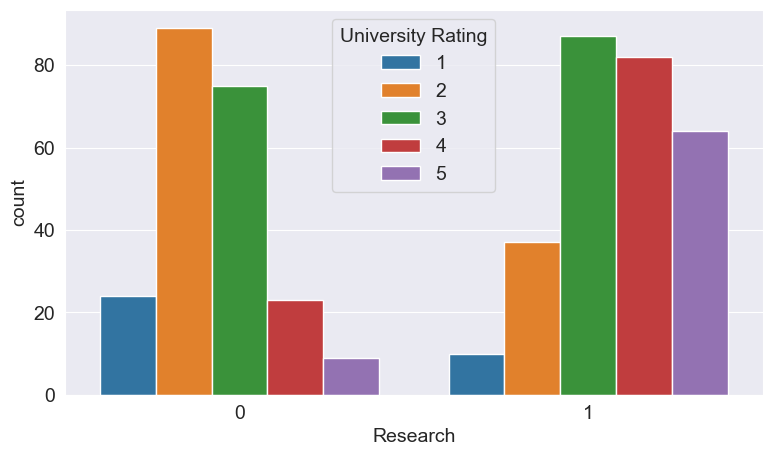

In [48]:
sns.countplot(x='Research', hue='University Rating', data=df)
plt.show()

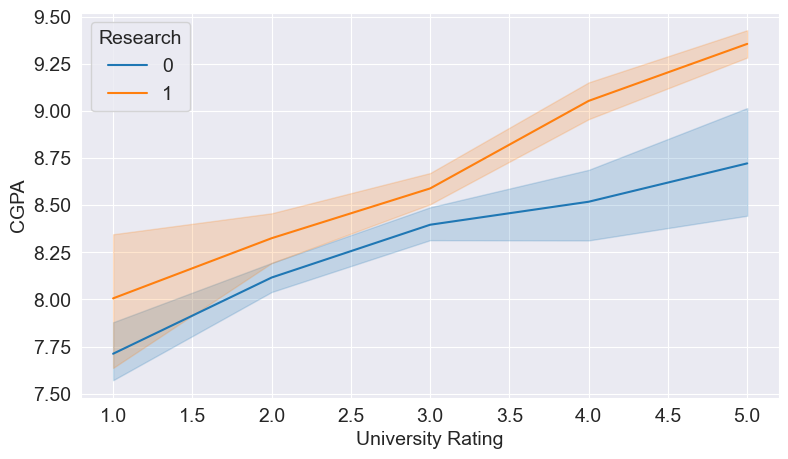

In [49]:
sns.lineplot(y='CGPA', x='University Rating',
             hue='Research',data=df)
plt.show()

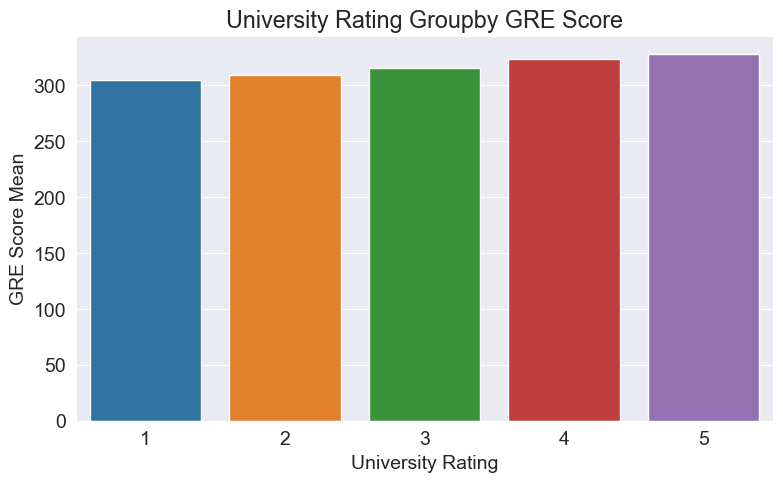

In [50]:
df.groupby('University Rating')['GRE Score'].mean()
sns.barplot(x=df.groupby('University Rating')['GRE Score'].mean().index,
            y=df.groupby('University Rating')['GRE Score'].mean().values)
plt.ylabel('GRE Score Mean')
plt.title('University Rating Groupby GRE Score')
plt.show()

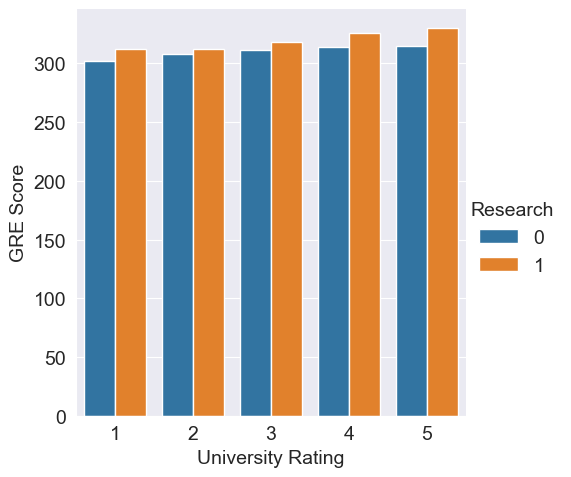

In [51]:
tt = df.groupby(['University Rating','Research']).mean().reset_index()
sns.factorplot(x='University Rating', y='GRE Score', hue='Research', data=tt, kind='bar')
plt.show()

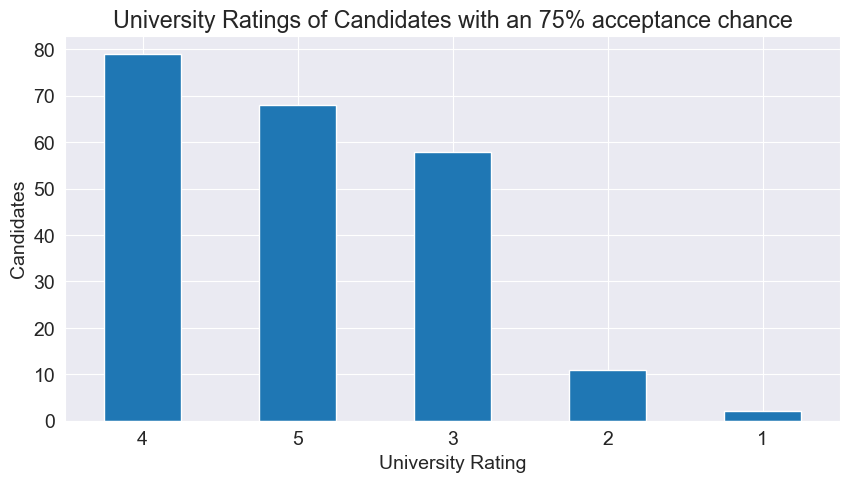

In [52]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
color_list=['red','blue','yellow','orange','black']
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

In [53]:
fig = px.scatter_3d(df, x="CGPA", y="GRE Score", z="TOEFL Score", hover_name="Chance of Admit",)
fig.show()

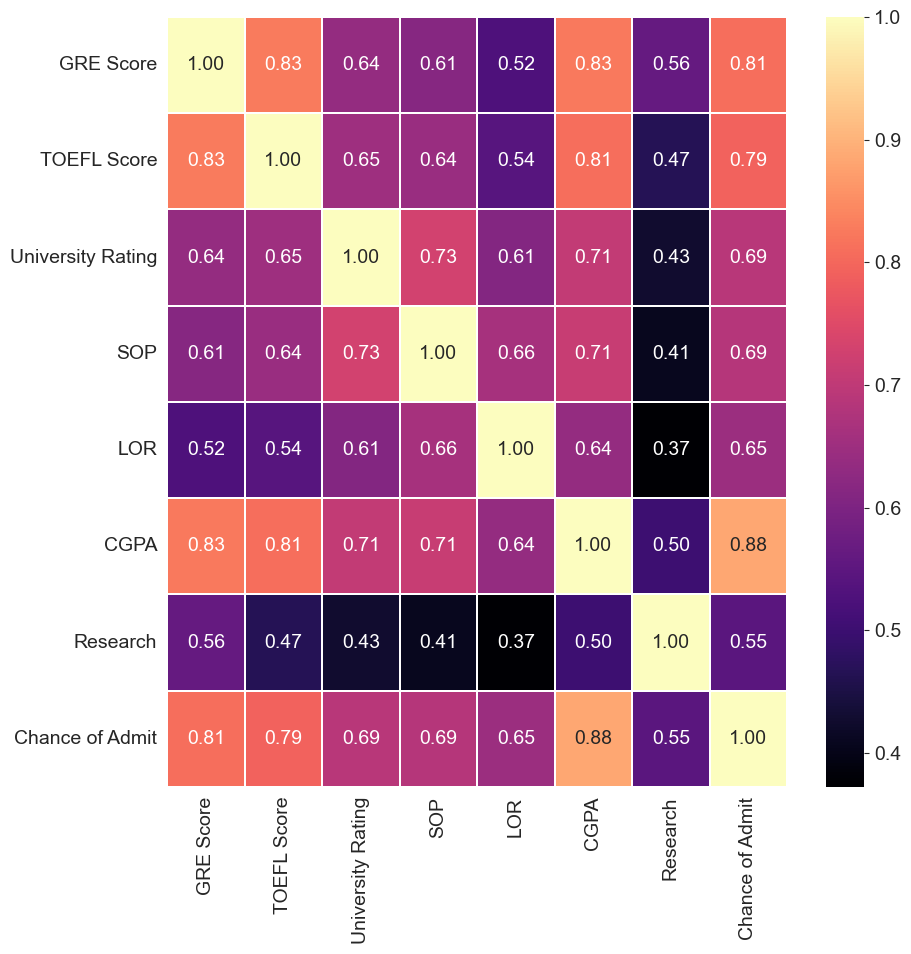

In [54]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### Asking Questions and Answering them For Better Insights

**Asking several predictive, insightful questions about the graduate admission dataset followed by answering them either by computing the results using Numpy/Pandas or by plotting appropriate graphs using Matplotlib/Seaborn Python libraries**

#### Question 01: Who are the top 20 students with highest chance?

In [55]:
top_candidates = df.sort_values('Chance of Admit', ascending=False).head(20)
top_candidates

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
203               340          120                  5  4.5  4.5  9.91   
144               340          120                  4  4.5  4.0  9.92   
25                336          119                  5  4.0  3.5  9.80   
204               334          120                  5  4.0  5.0  9.87   
72                336          112                  5  5.0  5.0  9.76   
214               333          119                  5  5.0  4.5  9.78   
497               337          117                  5  5.0  5.0  9.87   
82                340          120                  4  5.0  5.0  9.50   
131               339          114                  5  4.0  4.5  9.76   
149               339          116                  4  4.0  3.5  9.80   
385               340          113                  4  5.0  5.0  9.74   
386               335          117                  5  5.0  5.0  9.82   
430               340          115                  5  5.0  4.5  9.06   
400               333          117                  4  5.0  4.0  9.66   
213               338          120                  4  5.0  5.0  9.66   
24                334          119                  5  5.0  4.5  9.70   
373               336          119                  4  4.5  4.0  9.62   
215               331          117                  4  4.5  5.0  9.42   
35                331          112                  5  4.0  5.0  9.80   
71                332          118                  5  5.0  5.0  9.64   

            Research  Chance of Admit  
Serial No.                             
203                1             0.97  
144                1             0.97  
25                 1             0.97  
204                1             0.97  
72                 1             0.96  
214                1             0.96  
497                1             0.96  
82                 1             0.96  
131                1             0.96  
149                1             0.96  
385                1             0.96  
386                1             0.96  
430                1             0.95  
400                1             0.95  
213                1             0.95  
24                 1             0.95  
373                1             0.95  
215                1             0.94  
35                 1             0.94  
71                 1             0.94

#### Question 02: What is the CGPA for top 20 candidates with highest chance of admission?

In [56]:
top_candidates = df.sort_values('Chance of Admit', ascending=False).head(20)
top_candidates[['CGPA', 'Chance of Admit']]

CGPA  Chance of Admit
Serial No.                       
203         9.91             0.97
144         9.92             0.97
25          9.80             0.97
204         9.87             0.97
72          9.76             0.96
214         9.78             0.96
497         9.87             0.96
82          9.50             0.96
131         9.76             0.96
149         9.80             0.96
385         9.74             0.96
386         9.82             0.96
430         9.06             0.95
400         9.66             0.95
213         9.66             0.95
24          9.70             0.95
373         9.62             0.95
215         9.42             0.94
35          9.80             0.94
71          9.64             0.94

#### Question 03: How many percent of candidates with 'Chance of Admit'>=75% had Research experience? 

In [57]:
top_OneFourth_df = df[df['Chance of Admit']>=0.75]
top_OneFourth_df
research_df = top_OneFourth_df.groupby('Research').count()
research_df

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Research                                                              
0                34           34                 34   34   34    34   
1               184          184                184  184  184   184   

          Chance of Admit  
Research                   
0                      34  
1                     184

In [58]:
research_percent_df = ( research_df.at[1, 'Chance of Admit'] / research_df['Chance of Admit'].sum() ) * 100
research_percent_df

84.40366972477065

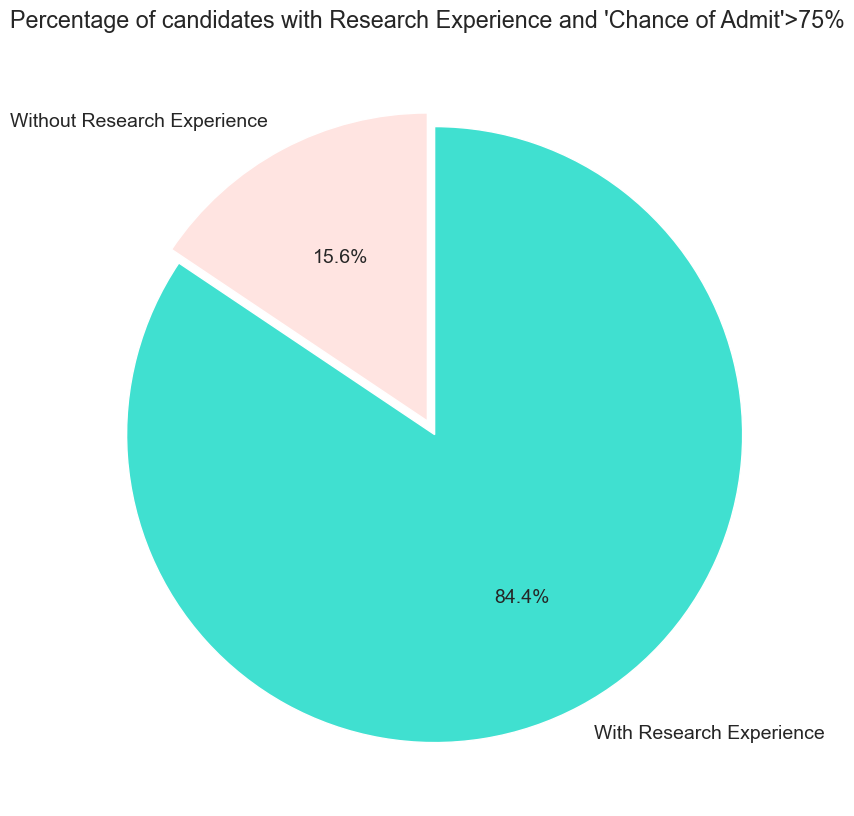

In [59]:
plt.figure(figsize=(22,10))
plt.title("Percentage of candidates with Research Experience and 'Chance of Admit'>75%")
colors = ['mistyrose', 'turquoise']
explode =(0, 0.05)
plt.pie(research_df['Chance of Admit'], labels=['Without Research Experience', 'With Research Experience'], 
        autopct='%1.1f%%', startangle=90, colors=colors, explode = explode);

#### Question 04: What is the Average of Chance of Admit for applicants with (SOP && LOR) >= 3.5 ?

In [60]:
sop_lor_df = df[(df['SOP']>=3.5) & (df['LOR']>=3.5)]
sop_lor_avg = sop_lor_df['Chance of Admit'].mean() * 100
print("Average Chance of Admit for applicants with (SOP && LOR) >= 3.5 is: {:.2f} %.".format(sop_lor_avg))

Average Chance of Admit for applicants with (SOP && LOR) >= 3.5 is: 81.85 %.


#### Question 05: How does the University Rating improve the chance of getting admitted ?

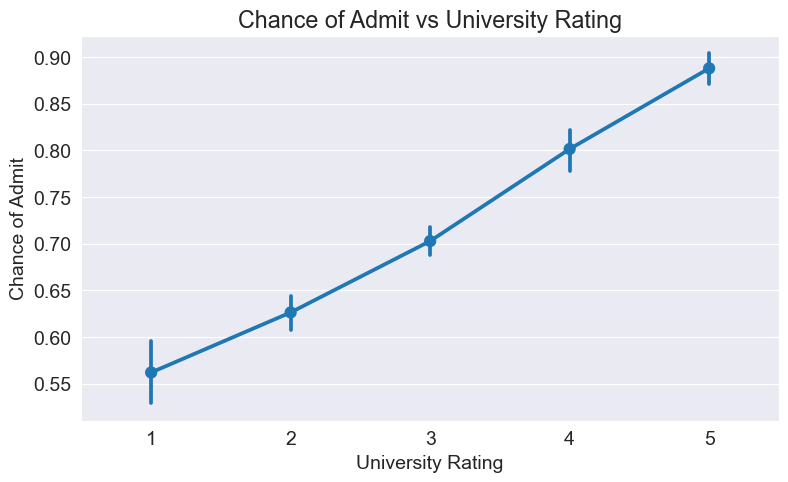

In [61]:
sns.pointplot(df['University Rating'] , df['Chance of Admit'])
plt.title('Chance of Admit vs University Rating')
plt.show()

###### A University Rating of 4 and above have a very good chance of admittance

#### Question 06: Does the University Rating influence my SOP and LOR Rating?

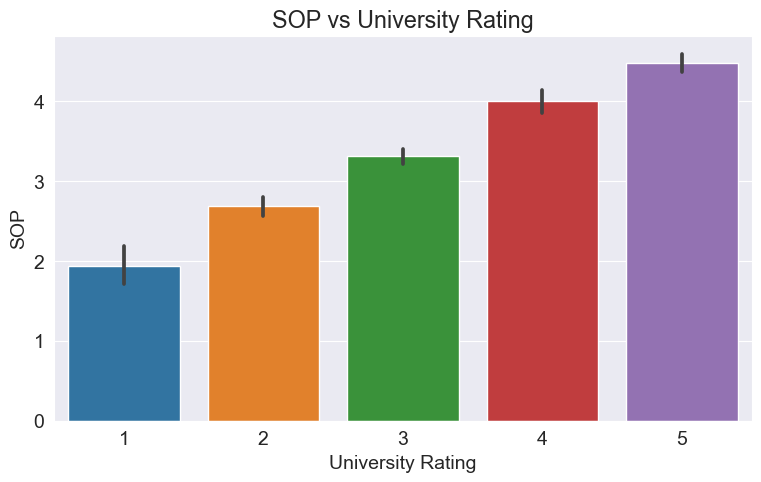

In [62]:
sns.barplot(df['University Rating'] , df['SOP'])
plt.title('SOP vs University Rating')
plt.show()

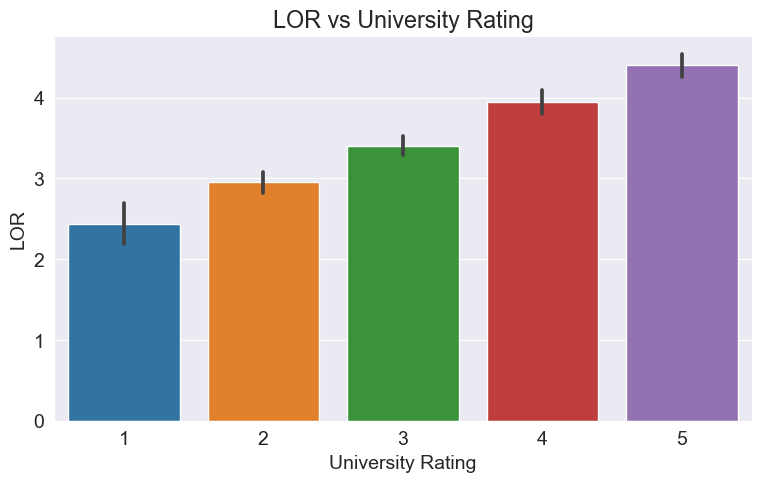

In [63]:
sns.barplot(df['University Rating'] , df['LOR'])
plt.title('LOR vs University Rating')
plt.show()

**The more the university rating you have , the more rating your SOP & LOR will get , this is relatable because SOP and LOR are attested by the university in which you studied and hence the University Rating influences the rating of your SOP & LOR**

#### Question 07: Does CGPA influence my University Rating?

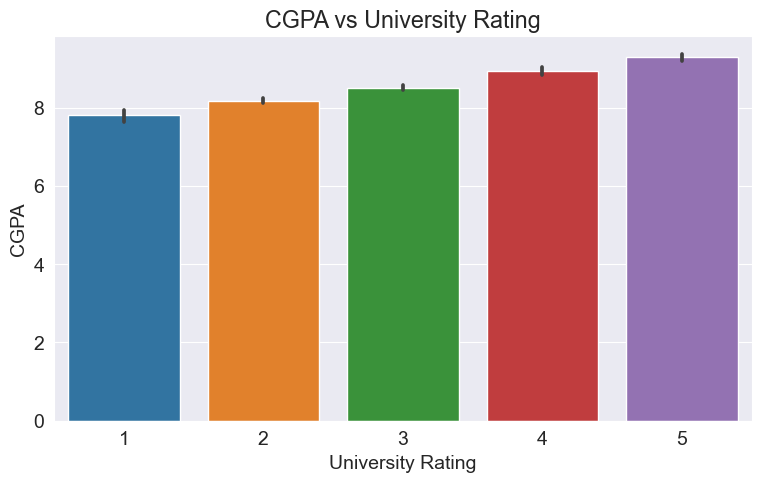

In [64]:
sns.barplot(df['University Rating']  , df['CGPA'])
plt.title('CGPA vs University Rating')
plt.show()

###### Students with more that 8.5 CGPA have high University Rating

#### Question 08: How much percentage of students are in each university type?

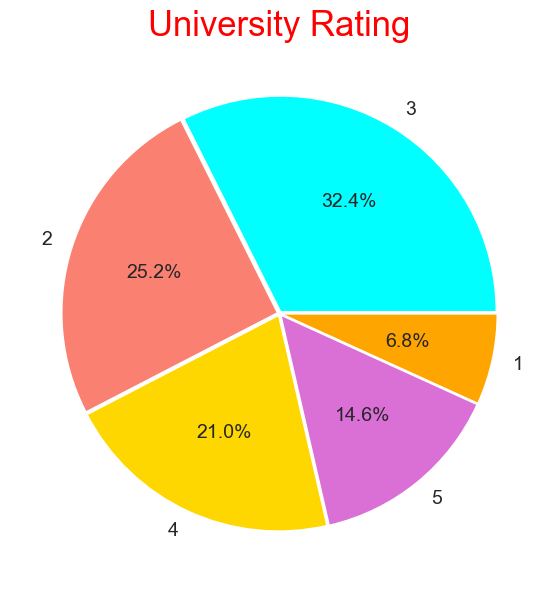

In [65]:
# df.groupby(['University Rating'])['University Rating'].count().plot.pie(autopct='%.f%%')
# plt.title('Percentage of students from different rated university')
# plt.show()

#The analysis of the university rating values was made. 
#A maximum of 3.0 is shown in the extracted results. All of these analysis results are given in pie.
colors = ['cyan','salmon','gold','orchid','orange']
explode = [0.01,0.01,0.01,0.01,0.01]
plt.figure(figsize=(7,7))
plt.pie(df['University Rating'].value_counts().values,explode=explode,
        labels=df['University Rating'].value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('University Rating',color='red',fontsize=25)
plt.show()

#### Question 09: How much percentage of students having Research Experience?

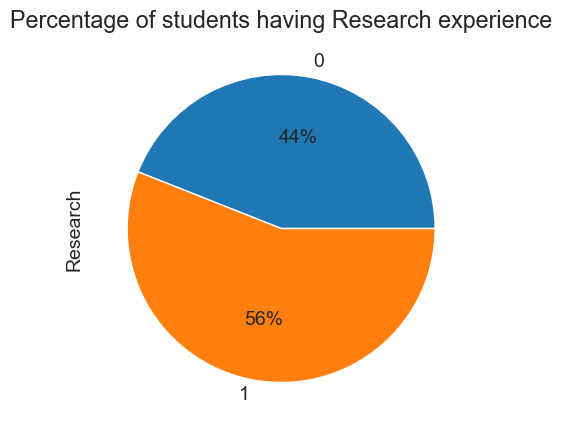

In [66]:
df.groupby(['Research'])['Research'].count().plot.pie(autopct='%.f%%')# ,ax=ax[0] ,shadow=True )
plt.title('Percentage of students having Research experience')
plt.show()

### Some Important Inferences

**A high score in GRE & TOEFL is very important**

**GRE : 320+**

**TOEFL : 110+**

**A CGPA of more than 8.5 is a must**

**Having Research experience is not very important , but having it is an added advantage**

**University Rating of 4 and above is very important**

**University Rating also influences the Rating of SOP & LOR** 

In [67]:
df.groupby('University Rating')[['SOP','LOR','CGPA']].mean()

SOP       LOR      CGPA
University Rating                              
1                  1.941176  2.441176  7.798529
2                  2.682540  2.956349  8.177778
3                  3.308642  3.401235  8.500123
4                  4.000000  3.947619  8.936667
5                  4.479452  4.404110  9.278082

#### Heatmap

In [68]:
df1 = df.iloc[:, 0:7] 

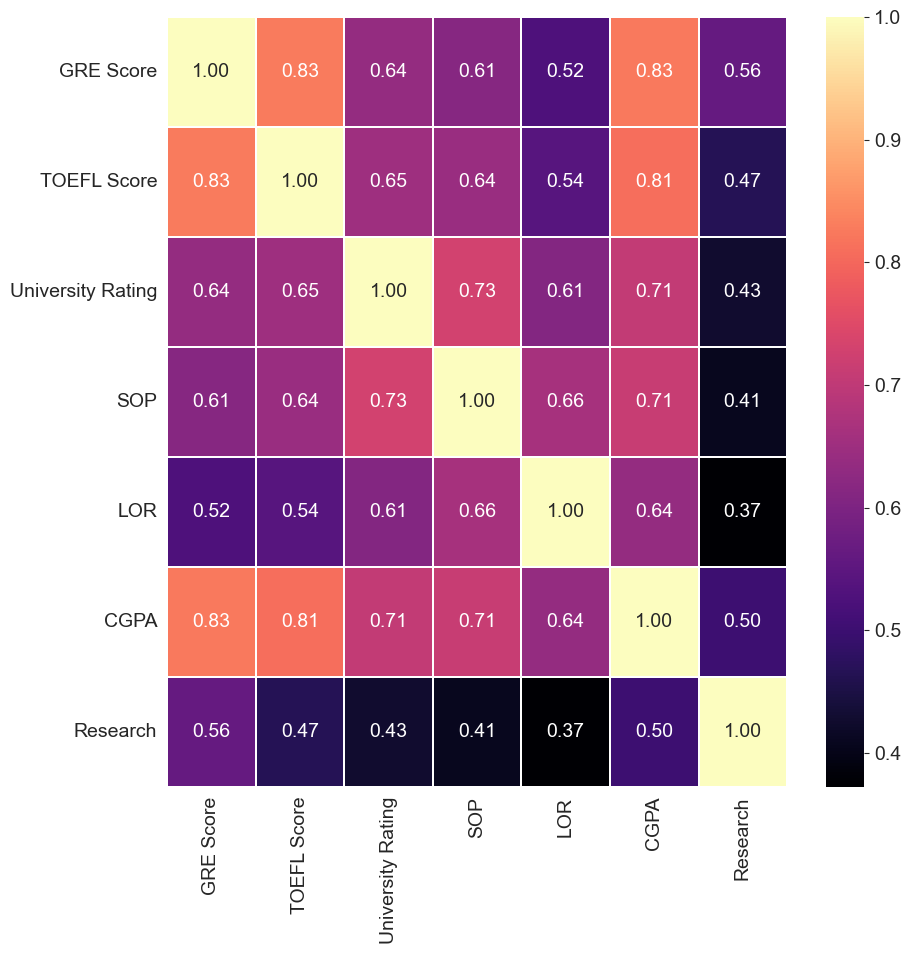

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

##### Checking VIF

In [70]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [71]:
df1

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   
...               ...          ...                ...  ...  ...   ...   
496               332          108                  5  4.5  4.0  9.02   
497               337          117                  5  5.0  5.0  9.87   
498               330          120                  5  4.5  5.0  9.56   
499               312          103                  4  4.0  5.0  8.43   
500               327          113                  4  4.5  4.5  9.04   

            Research  
Serial No.            
1                  1  
2                  1  
3                  1  
4                  1  
5                  0  
...              ...  
496                1  
497                1  
498                1  
499                0  
500                0  

[500 rows x 7 columns]

In [72]:
compute_vif(df1.columns).sort_values('VIF', ascending=False)

Variable       VIF
5               CGPA  4.777833
0          GRE Score  4.463733
1        TOEFL Score  3.904258
3                SOP  2.833239
2  University Rating  2.621300
4                LOR  2.029224
6           Research  1.493982

All VIF values are less than 5

In [73]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  Chance of Admit  
Serial No.                             
1                  1             0.92  
2                  1             0.76  
3                  1             0.72  
4                  1             0.80  
5                  0             0.65

In [74]:
x = df.iloc[:,:-1] 
y = df.iloc[:,-1]    

In [75]:
x.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
1                 337          118                  4  4.5  4.5  9.65   
2                 324          107                  4  4.0  4.5  8.87   
3                 316          104                  3  3.0  3.5  8.00   
4                 322          110                  3  3.5  2.5  8.67   
5                 314          103                  2  2.0  3.0  8.21   

            Research  
Serial No.            
1                  1  
2                  1  
3                  1  
4                  1  
5                  0

In [76]:
y.head()

Serial No.
1    0.92
2    0.76
3    0.72
4    0.80
5    0.65
Name: Chance of Admit, dtype: float64

In [77]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [78]:
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
xtrain.shape, xtest.shape, ytrain.shape,ytest.shape

((400, 7), (100, 7), (400,), (100,))

In [80]:
k = 42
models = [LinearRegression(),DecisionTreeRegressor(random_state = k),
          RandomForestRegressor(random_state = k),Lasso(random_state = k),Ridge(random_state = k),
         SVR(),AdaBoostRegressor(random_state = k),GradientBoostingRegressor(random_state = k),
          XGBRegressor(random_state = k)]
for i in models:
    print(20*'=',i,20*'=')
    model = i
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('Training_Score   : ',model.score(xtrain,ytrain))
    print('Testing_Score    : ',model.score(xtest,ytest))
    print('MSE              : ',mean_squared_error(ytest,ypred))
    print('MAE              : ',mean_absolute_error(ytest,ypred))
    print('RMSE             : ',np.sqrt(mean_squared_error(ytest,ypred)))
    print('MAPE             : ',mean_absolute_percentage_error(ytest,ypred))
    print('R^2_Score        : ', r2_score(ytest,ypred) )
    print(70*'*')

==================== LinearRegression() ====================
Training_Score   :  0.8220935158272195
Testing_Score    :  0.8188835723780066
MSE              :  0.0037038309448697666
MAE              :  0.04276066764019817
RMSE             :  0.0608591073288934
MAPE             :  0.06873872864871644
R^2_Score        :  0.8188835723780066
**********************************************************************
==================== DecisionTreeRegressor(random_state=42) ====================
Training_Score   :  1.0
Testing_Score    :  0.5748166259168705
MSE              :  0.008695
MAE              :  0.0651
RMSE             :  0.09324698386543127
MAPE             :  0.1041439388354414
R^2_Score        :  0.5748166259168705
**********************************************************************
==================== RandomForestRegressor(random_state=42) ====================
Training_Score   :  0.9684910559531074
Testing_Score    :  0.7868410904645475
MSE              :  0.004359099700000005
M

In [81]:
best_model = LinearRegression()

In [82]:
best_model.fit(xtrain,ytrain)

LinearRegression()

In [83]:
ypred = best_model.predict(xtest)

In [84]:
print('Training_Score   : ',best_model.score(xtrain,ytrain))
print('Testing_Score    : ',best_model.score(xtest,ytest))
print('MSE              : ',mean_squared_error(ytest,ypred))
print('MAE              : ',mean_absolute_error(ytest,ypred))
print('RMSE             : ',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE             : ',mean_absolute_percentage_error(ytest,ypred))
print('R^2 Score        : ', r2_score(ytest,ypred))

Training_Score   :  0.8220935158272195
Testing_Score    :  0.8188835723780066
MSE              :  0.0037038309448697666
MAE              :  0.04276066764019817
RMSE             :  0.0608591073288934
MAPE             :  0.06873872864871644
R^2 Score        :  0.8188835723780066


In [85]:
df_Actual_predicted = pd.DataFrame({'Actual_values':ytest,'Predicted_values':ypred})
with pd.option_context('display.max_rows', 100):
    display(df_Actual_predicted)

Actual_values  Predicted_values
Serial No.                                 
362                  0.93          0.914374
74                   0.84          0.795483
375                  0.39          0.572660
156                  0.77          0.707463
105                  0.74          0.815830
395                  0.89          0.862125
378                  0.47          0.474943
125                  0.57          0.648636
69                   0.68          0.823767
451                  0.82          0.807089
10                   0.45          0.722068
195                  0.77          0.726076
407                  0.61          0.656452
85                   0.94          0.936521
372                  0.89          0.824162
389                  0.49          0.510105
496                  0.87          0.839395
31                   0.65          0.597778
317                  0.54          0.533592
409                  0.57          0.571595
491                  0.67          0.665404
492                  0.54          0.553492
281                  0.68          0.722839
357                  0.79          0.794955
77                   0.74          0.780085
462                  0.68          0.602818
498                  0.93          0.948084
212                  0.82          0.847650
102                  0.64          0.627865
335                  0.73          0.743791
476                  0.59          0.555968
337                  0.72          0.730090
441                  0.53          0.545130
174                  0.89          0.861044
3                    0.72          0.657211
334                  0.71          0.737118
410                  0.61          0.554582
71                   0.94          0.957030
210                  0.68          0.643964
64                   0.56          0.710942
385                  0.96          0.970262
94                   0.44          0.575453
486                  0.70          0.670838
186                  0.89          0.858283
34                   0.90          0.940819
78                   0.64          0.578549
1                    0.92          0.958127
12                   0.84          0.838919
416                  0.76          0.795932
23                   0.94          0.925642
73                   0.93          0.888191
183                  0.68          0.564104
132                  0.77          0.704202
411                  0.54          0.527080
194                  0.94          0.953304
56                   0.64          0.597646
149                  0.96          0.955739
19                   0.63          0.739441
205                  0.69          0.662935
79                   0.44          0.502025
495                  0.68          0.629898
263                  0.70          0.680322
324                  0.62          0.599130
484                  0.71          0.592883
80                   0.46          0.441329
40                   0.48          0.589113
452                  0.89          0.866763
47                   0.86          0.897532
239                  0.70          0.658224
392                  0.71          0.706496
353                  0.64          0.618025
342                  0.79          0.785821
278                  0.70          0.691608
291                  0.58          0.562877
318                  0.58          0.554340
305                  0.62          0.651017
269                  0.83          0.846238
70                   0.78          0.863718
456                  0.59          0.537338
466                  0.54          0.631701
155                  0.80          0.769475
83                   0.92          0.848362
478                  0.65          0.617399
173                  0.86          0.847013
322                  0.73          0.734321
91                   0.64          0.667111
181                  0.71          0.604943
415                  0.72          0.738681
313                  0.78          0.789300
279     

### Pickling the Best Model

In [86]:
import pickle

In [87]:
file = 'regressor.pkl'
pickle.dump(best_model, open('regressor.pkl', 'wb')) #write binary

In [88]:
pic = pickle.load(open('regressor.pkl', 'rb')) #read binary
pic

LinearRegression()

In [89]:
pic.predict([[334,116,4,4.0,3.5,9.54,1]])

array([0.91437431])

In [90]:
pic.predict([[318,110,1,2.5,3.5,8.54,1]])

array([0.73451297])

In [91]:
xtest

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
Serial No.                                                              
362               334          116                  4  4.0  3.5  9.54   
74                314          108                  4  4.5  4.0  9.04   
375               315          105                  2  2.0  2.5  7.65   
156               312          109                  3  3.0  3.0  8.69   
105               326          112                  3  3.5  3.0  9.05   
...               ...          ...                ...  ...  ...   ...   
348               299           94                  1  1.0  1.5  7.34   
87                315          106                  3  4.5  3.5  8.42   
76                329          114                  2  2.0  4.0  8.56   
439               318          110                  1  2.5  3.5  8.54   
16                314          105                  3  3.5  2.5  8.30   

            Research  
Serial No.            
362                1  
74                 1  
375                0  
156                0  
105                1  
...              ...  
348                0  
87                 0  
76                 1  
439                1  
16                 0  

[100 rows x 7 columns]

In [92]:
ytest

Serial No.
362    0.93
74     0.84
375    0.39
156    0.77
105    0.74
       ... 
348    0.42
87     0.72
76     0.72
439    0.67
16     0.54
Name: Chance of Admit, Length: 100, dtype: float64

### End